In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('D:/Study/MCA/5thSem/ML/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df['Kyphosis'] = [1 if i == 'absent' else 0 for i in df['Kyphosis']]
df

,Kyphosis,Age,Number,Start
0,1,71,3,5
1,1,158,3,14
2,0,128,4,5
3,1,2,5,1
4,1,1,4,15
...,...,...,...,...
76,0,157,3,13
77,1,26,7,13
78,1,120,2,13
79,0,42,7,6


In [7]:
y = df['Kyphosis']
x = df.iloc[:,1:4]
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40) 
print(x_train.shape)
print(x_test.shape)

(56, 3)
(25, 3)


In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 10)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(x_train)
print(accuracy_score(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

0.875
[[ 8  5]
 [ 2 41]]


In [11]:
test_pred = model.predict(x_test)
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))

0.8
[[ 2  2]
 [ 3 18]]


In [12]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from sklearn.externals.six import StringIO

C:\Users\Vijaykumar R Pai.LAPTOP-C26T1P75\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


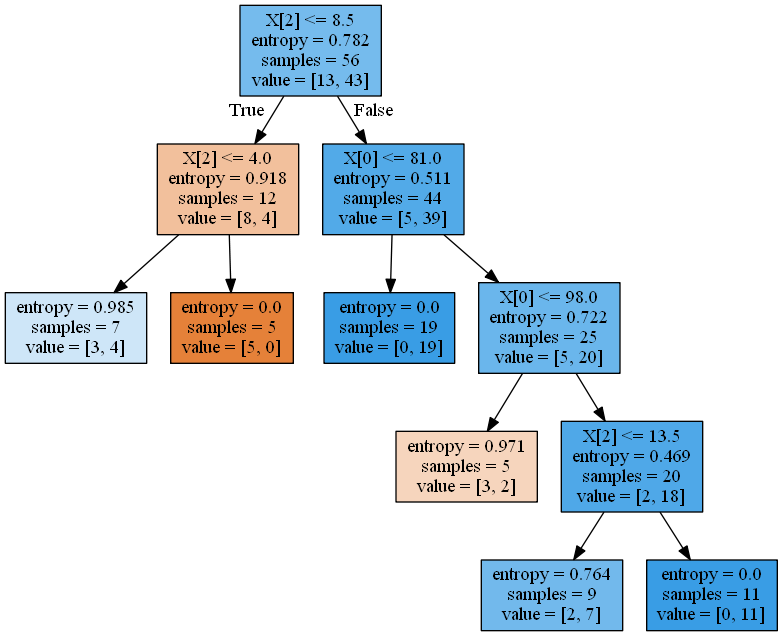

In [13]:
data = StringIO()
export_graphviz(model, out_file = data, filled = True, max_depth = 5)
graph = pydot.graph_from_dot_data(data.getvalue())
Image(graph[0].create_png())